<a href="https://colab.research.google.com/github/alitourani/deep-learning-from-scratch/blob/main/Codes/CNNs/1_DigitClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Classification using VGG-16, VGG-19, and ResNet-50**

🎯 **Goal:** The main goal of this application is to use a pre-trained network for image classification

🗄️ **Dataset:** ImageNet (https://image-net.org/index) dataset

**More:** https://pyimagesearch.com/2016/08/10/imagenet-classification-with-python-and-keras/

**I. Imports and Configurations**

In [1]:
import cv2 as cv
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.applications import VGG16, VGG19, ResNet50
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.imagenet_utils import decode_predictions

In [7]:
imagePath = './_testData/test2_cat.jpg'
netImageSizes = {'vgg16': (224, 224), 'vgg19': (224, 224), 'resnet': (224, 224)}

**II. Loading Data for the Network**

Loading and preprocessing image...
Preparing vgg16 network ...
Converting (1200, 1200, 3) to (1, 224, 224, 3)
Preparing vgg19 network ...
Converting (1200, 1200, 3) to (1, 224, 224, 3)
Preparing resnet network ...
Converting (1200, 1200, 3) to (1, 224, 224, 3)
Data is ready to be fed to the network!


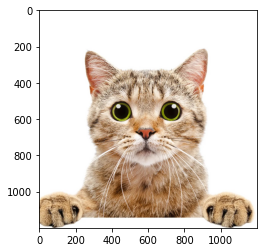

In [20]:
netImages = {}
# Load the input image for later use
origImage = cv.imread(imagePath)
# Show Loaded image
plt.imshow(cv.cvtColor(origImage, cv.COLOR_BGR2RGB))
# Preparing the image for the ANN input
print("Loading and preprocessing image...")
# Iterating over all variations of networks
for cnn, value in netImageSizes.items():
    print(f'Preparing {cnn} network ...')
    # Loading in PIL/Pillow format
    image = keras.utils.load_img(imagePath, target_size=value)
    # Convert the image to a NumPy format
    image = keras.utils.img_to_array(image)
    # Preprocessing the image
    # Changing (224, 224, 3) to (224, 224, 3, 1) as network input
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    print(f"Converting {origImage.shape} to {image.shape}")
    # Adding to images dictionary
    netImages[cnn] = image
print("Data is ready to be fed to the network!")

**III. Prediction using VGG-16, VGG-19, ResNet-50**

In [29]:
# Load model
model = VGG16(weights='imagenet')
# Prediction (classification using pre-trained network)
predicts = model.predict(netImages['vgg16'])
predResults = decode_predictions(predicts)
# Create a log
print("[INFO] classifying image...")
# Displaying the top predictions with their probabilities
for (i, (imagenetID, label, prob)) in enumerate(predResults[0]):
    objectProb = round(prob * 100, 4)
    print(f'{i+1}) {label} with probability {objectProb}')
# Now, draw the image using OpenCV
(imagenetID, label, prob) = predResults[0][0]

1/1 [==============================] - 0s 163ms/step
[INFO] classifying image...
1) tabby with probability 51.0971
2) Egyptian_cat with probability 23.0358
3) tiger_cat with probability 10.9877
4) cup with probability 1.1765
5) Persian_cat with probability 1.1304


In [28]:
# Load model
model = VGG19(weights='imagenet')
# Prediction (classification using pre-trained network)
predicts = model.predict(netImages['vgg19'])
predResults = decode_predictions(predicts)
# Create a log
print("[INFO] classifying image...")
# Displaying the top predictions with their probabilities
for (i, (imagenetID, label, prob)) in enumerate(predResults[0]):
    objectProb = round(prob * 100, 4)
    print(f'{i+1}) {label} with probability {objectProb}')
# Now, draw the image using OpenCV
(imagenetID, label, prob) = predResults[0][0]

1/1 [==============================] - 0s 188ms/step
[INFO] classifying image...
1) tabby with probability 57.1898
2) Egyptian_cat with probability 16.837
3) tiger_cat with probability 6.7333
4) Persian_cat with probability 6.1549
5) lynx with probability 2.461


In [27]:
# Load model
model = ResNet50(weights='imagenet')
# Prediction (classification using pre-trained network)
predicts = model.predict(netImages['resnet'])
predResults = decode_predictions(predicts)
# Create a log
print("[INFO] classifying image...")
# Displaying the top predictions with their probabilities
for (i, (imagenetID, label, prob)) in enumerate(predResults[0]):
    objectProb = round(prob * 100, 4)
    print(f'{i+1}) {label} with probability {objectProb}')
# Now, draw the image using OpenCV
(imagenetID, label, prob) = predResults[0][0]

1/1 [==============================] - 1s 1s/step
[INFO] classifying image...
1) tabby with probability 63.7121
2) Egyptian_cat with probability 5.0006
3) hamper with probability 4.5126
4) Persian_cat with probability 4.162
5) lynx with probability 3.8083
